# 第 2 章  神经网络基础  —— 习题解答

## 2.1 
多层感知机和感知机的区别是什么？为什么会有这样的区别？

## 2.2 
假设有一个只有1个隐层的多层感知机，其输入、隐层、输出层的神经元个数分别为33、512、10，那么这个多层感知机中总共有多少个参数是可以被训练的？

输入层和隐层之间权重`W`的个数为`33 * 512 = 16896`，加上512个偏置`b`后共`17408`个参数。

隐层和输出层之间权重`W`的个数为`512 * 10 = 5120`，加上10个偏置`b`后共`5130`个参数。

二者相加，这个多层感知机中可被训练的参数共有`17408 + 5130 = 22538`个。

## 2.3
反向传播中，神经元的梯度是如何计算的？权重是如何更新的？

## 2.4
请在同一个坐标系内画出五种不同的激活函数图像，并比较它们的取值范围。

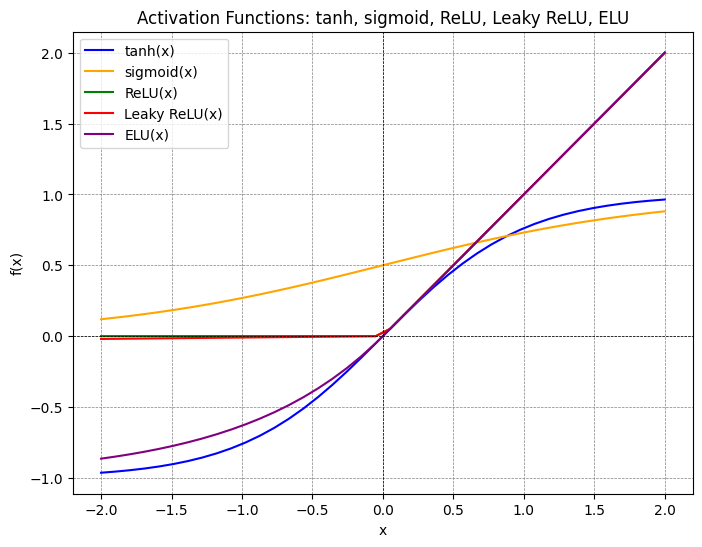

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create an array of values from -10 to 10
x = np.linspace(-2, 2, 40)

# Calculate the functions
tanh_values = np.tanh(x)
sigmoid_values = 1 / (1 + np.exp(-x))
relu_values = np.maximum(0, x)
leaky_relu_values = np.where(x > 0, x, 0.01 * x)  # Leaky ReLU with alpha = 0.01
elu_values = np.where(x > 0, x, np.exp(x) - 1)  # ELU with alpha = 1

# Create the plot
plt.figure(figsize=(8, 6))

# Plot each function
plt.plot(x, tanh_values, label='tanh(x)', color='blue')
plt.plot(x, sigmoid_values, label='sigmoid(x)', color='orange')
plt.plot(x, relu_values, label='ReLU(x)', color='green')
plt.plot(x, leaky_relu_values, label='Leaky ReLU(x)', color='red')
plt.plot(x, elu_values, label='ELU(x)', color='purple')

# Add title and labels
plt.title('Activation Functions: tanh, sigmoid, ReLU, Leaky ReLU, ELU')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add legend
plt.legend()

# Show the plot
plt.show()

## 2.5
请简述三种避免过拟合问题的方法。

## 2.6
sigmoid激活函数的极限是0和1，请给出它的导数形式并求出其在原点的导数值。

答：

$$
\begin{equation}
\begin{aligned}
\sigma'(x) &= (\frac{1}{1 + {e}^{-x}})'\\
&= ((1 + {e}^{-x})^{-1})'\\
&= (-1)\cdot(1+{e}^{-x})^{-2}\cdot{e}^{-x}\cdot(-1)\\
&= \frac{{e}^{-x}}{(1+{e}^{-x})^{2}}\\
&= \frac{{e}^{-x}}{(1+{e}^{-x})^{2}}\\
&= \frac{1}{1+{e}^{-x}}\cdot\frac{{e}^{-x}}{1+{e}^{-x}}\\
&= \frac{1}{1+{e}^{-x}}\cdot\frac{1+{e}^{-x}-1}{1+{e}^{-x}}\\
&= \frac{1}{1+{e}^{-x}}\cdot(1-\frac{1}{1+{e}^{-x}})\\
&= \sigma(x)\cdot(1 - \sigma(x))
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
\sigma'(x)|_{x=0} &= \sigma(x)\cdot(1 - \sigma(x))|_{x=0}\\
&= \sigma(0)\cdot(1 - \sigma(0))\\
&= \frac{1}{2}\cdot(1 - \frac{1}{2})\\
&= \frac{1}{4}
\end{aligned}
\end{equation}
$$

## 2.7 

假设激活函数的表达式为

$$\phi(v) = \frac{v}{\sqrt{1 + {v}^2}}$$

请给出它的导数表达式并求出其在原点的取值。

答：

$$
\begin{equation}
\begin{aligned}
{\phi}'(v) &= (\frac{v}{\sqrt{1+{v}^2}})'\\
&= [v\cdot(1 + {v}^2)^{-\frac{1}{2}}]'\\
&= {v}'\cdot(1+{v}^2)^{-\frac{1}{2}} + v\cdot[(1 + {v}^2)^{-\frac{1}{2}}]'\\
&= (1+{v}^2)^{-\frac{1}{2}} + v\cdot[-\frac{1}{2}\cdot(1 + {v}^2)^{-\frac{3}{2}}\cdot2v]\\
&= (1+{v}^2)^{-\frac{1}{2}} - {v}^2\cdot(1 + {v}^2)^{-\frac{3}{2}}\\
&= \frac{1}{\sqrt{1+{v}^2}} - \frac{{v}^2}{\sqrt{(1+{v}^2)^3}}\\
&= \frac{1}{\sqrt{1+{v}^2}} - \frac{{v}^2}{(1+{v}^2)\sqrt{1+{v}^2}}\\
&= \frac{1+{v}^2}{(1+{v}^2)\sqrt{1+{v}^2}} - \frac{{v}^2}{(1+{v}^2)\sqrt{1+{v}^2}}\\
&= \frac{1}{(1+{v}^2)\sqrt{1+{v}^2}}\\
&= (1+{v}^2)^{-\frac{3}{2}}
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
{\phi}'(v)|_{v=0} &= (1+{v}^2)^{-\frac{3}{2}}|_{v=0}\\
&= 1
\end{aligned}
\end{equation}
$$

## 2.8

假设基本采用表2.1中的符号，一个经过训练的有两个隐层的MLP如何决定各个3输出神经元的标签？预测过程中，当前输入的样本的标签如何决定？

## 2.9

一种更新权重的方法是引入动量项，即

$$\Delta \omega(n) = \alpha \Delta \omega(n - 1) + \alpha^2 \Delta \omega(n - 2) + \cdots$$

动量项$\alpha$的取值范围通常为`[0, 1]`，这样取值对于权重更新有什么影响？如果取值范围为`[-1, 0]`呢？

## 2.10

反向传播中，采用不同的激活函数对于梯度的计算有什么不同？请设计一个新的激活函数并给出神经元的梯度计算公式。

## 2.11

请设计一个多层感知机实现4位全加器的功能，即两个4比特输入得到一个4比特输出及一个1比特进位。请自行构建训练集、测试集，完成训练及测试。

## 2.12

请在不使用任何编程框架的前提下，重新实现解决习题2.11的代码。